<a href="https://colab.research.google.com/github/teazaw/MAT422-Mathematical-Methods-in-Data-Science/blob/main/HW7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **3.2.1 Limits and Continuity**
 A **limit** is a fundamental concept in calculus that describe the value that a function approaches as the input approaches a particular point.

The definition of a limit is as follows:
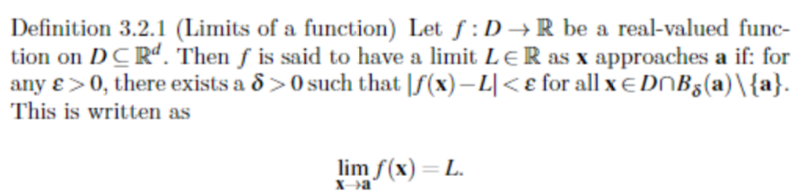



 A **continuous function** is a function that does not have any abrupt changes in value. The function below is continuous.
 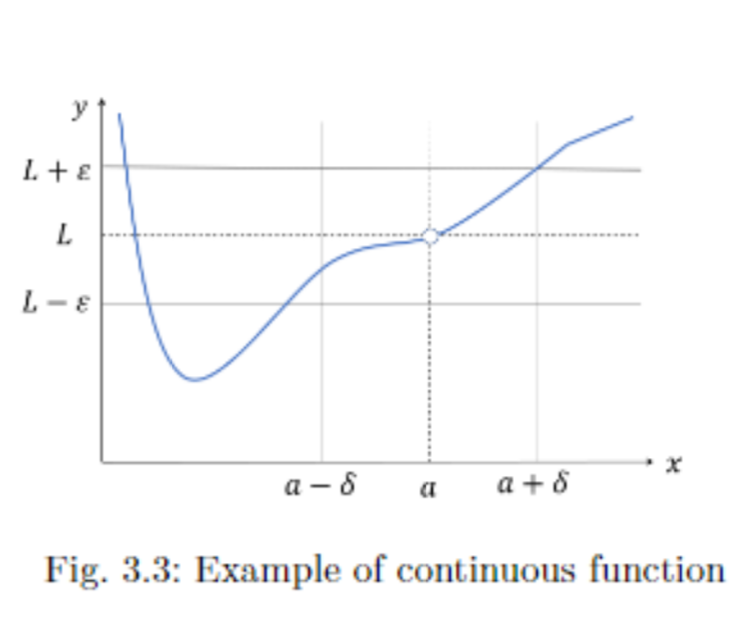

A function *f(x)* is continuous at a point *x=a* if the following three conditions are met:
1. The function is defined at *a* :  
        f(a) exists.
2. The limit of the function exists as *x* approaches *a* :
        lim f(x) exists.
3. The limit of the function equals the function's value at *a*:
        lim f(x)=f(a).

If any of the three conditions fail, the function is **discontinuous** at that point. There are several different types of discontinuities:

1. **Jump discontinuity**: The function "jumps" from one value to another.
2. **Infinite discontinuity**: The function goes to infinity at a certain point.
3. **Removable discontinuity**:There is a hole in the function at a certain point, but it could be fixed by properly defining the function at that point.

The following code defines a function that is undefined at *x=1* but behaves like *f(x)=x+1* for all other values.



Approaching 1 from the left:
x_left = [0.99595864 0.99696873 0.99797882 0.99898891 0.999999  ]
y_left = [1.99595864 1.99696873 1.99797882 1.99898891 1.999999  ]

Approaching 1 from the right:
x_right = [1.000001   1.00101109 1.00202118 1.00303127 1.00404136]
y_right = [2.000001   2.00101109 2.00202118 2.00303127 2.00404136]

Estimated limit from the left: 1.9954535909113003
Estimated limit from the right: 2.0045464090997918


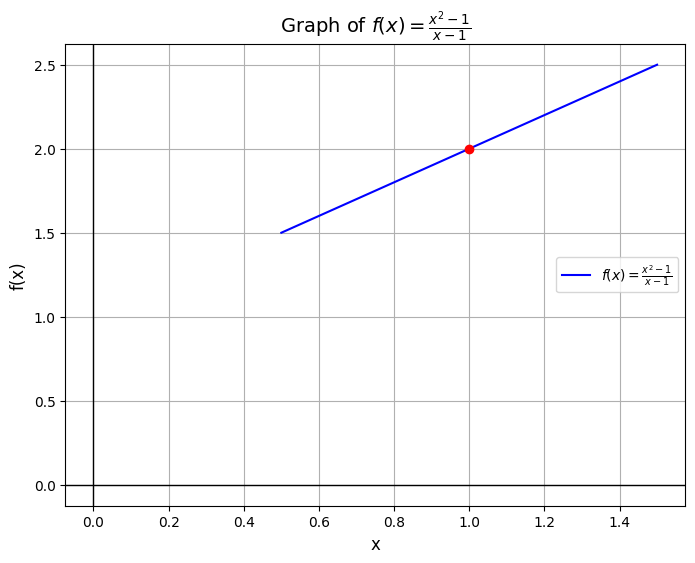

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# define function
def f(x):
    return (x**2 - 1) / (x - 1)

# approach 1 from the left
x_left = np.linspace(0.9, 0.999999, 100)
y_left = f(x_left)

# approach 1 from the right
x_right = np.linspace(1.000001, 1.1, 100)
y_right = f(x_right)

print("Approaching 1 from the left:")
print(f"x_left = {x_left[-5:]}")
print(f"y_left = {y_left[-5:]}")
print("\nApproaching 1 from the right:")
print(f"x_right = {x_right[:5]}")
print(f"y_right = {y_right[:5]}")

#actual limits
limit_left = np.mean(y_left[-10:])
limit_right = np.mean(y_right[:10])

print(f"\nEstimated limit from the left: {limit_left}")
print(f"Estimated limit from the right: {limit_right}")

import numpy as np

#graph function
x_values = np.linspace(0.5, 1.5, 400)
x_values = x_values[x_values != 1]
y_values = f(x_values)
plt.figure(figsize=(8, 6))
plt.plot(x_values, y_values, label=r'$f(x) = \frac{x^2 - 1}{x - 1}$', color='b')


plt.scatter(1, 2, color='r', zorder=5)
plt.title('Graph of $f(x) = \\frac{x^2 - 1}{x - 1}$', fontsize=14)
plt.xlabel('x', fontsize=12)
plt.ylabel('f(x)', fontsize=12)
plt.axhline(0, color='black',linewidth=1)
plt.axvline(0, color='black',linewidth=1)
plt.legend()
plt.grid(True)
plt.show()



# **3.2.2 Derivatives**
Derivatives represent the rate at which a function changes at any given point and are often described as the "slope" of a function at a particular point.

The formal definition of a derivative is as follows:


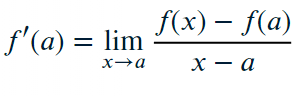


Graphically, the derivative looks like this:
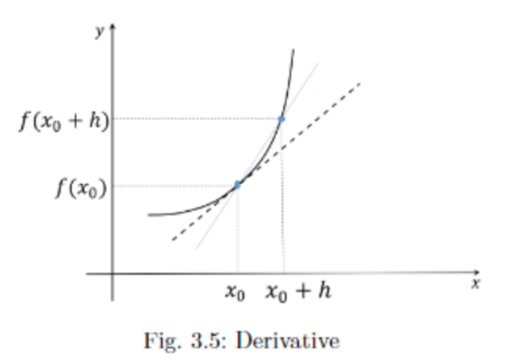


*   A positive derivative indicates that, at that point, the function is increasing.

*   A negative derivate indicates that, at that point, the function is decreasing.

*   A derivative of zero indicates that, at that point, there is a local maxiumum, minimum or inflection point.

There are higher-order derivatives, like second order, that provide further information about the function.

The following code plots a function and its derivative.

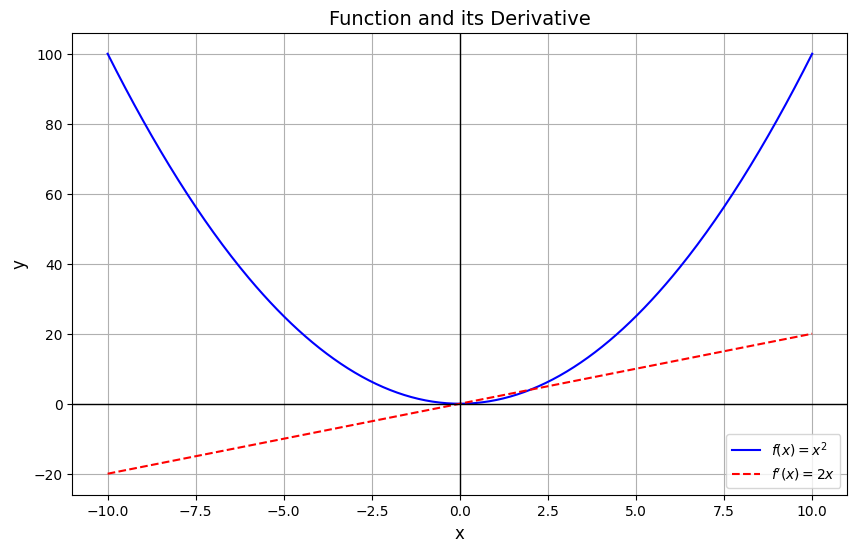

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# define function
def f(x):
    return x**2

# compute derivative
def derivative(f, x, h=1e-5):
    return (f(x + h) - f(x)) / h


x_values = np.linspace(-10, 10, 400)
f_values = f(x_values)
df_values = derivative(f, x_values)

plt.figure(figsize=(10, 6))
plt.plot(x_values, f_values, label=r'$f(x) = x^2$', color='b')
plt.plot(x_values, df_values, label=r"$f'(x) = 2x$", color='r', linestyle='--')


plt.title("Function and its Derivative", fontsize=14)
plt.xlabel("x", fontsize=12)
plt.ylabel("y", fontsize=12)
plt.axhline(0, color='black',linewidth=1)
plt.axvline(0, color='black',linewidth=1)


plt.legend()
plt.grid(True)
plt.show()


# **3.2.3 Taylor's Theorem**

**Taylor's theorem** gives an approximation of a differentiable function around a given point by a polynomial called the **Taylor series**. The idea is that a complicated function can be expressed as an infinite sum of polynomials.

If *f(x)* is a function that is infinitely differentiable at a point a, then the Taylor series of *f(x)* around a is given by:

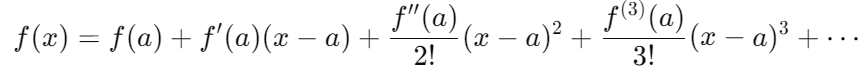

A Maclaurin polynomial is a special case of the Taylor polynomial that uses zero as its single point.

The code below computes the nth degree Taylor polynomial for *f(x)=e^x* around *a=0*, or the Maclaurin series.

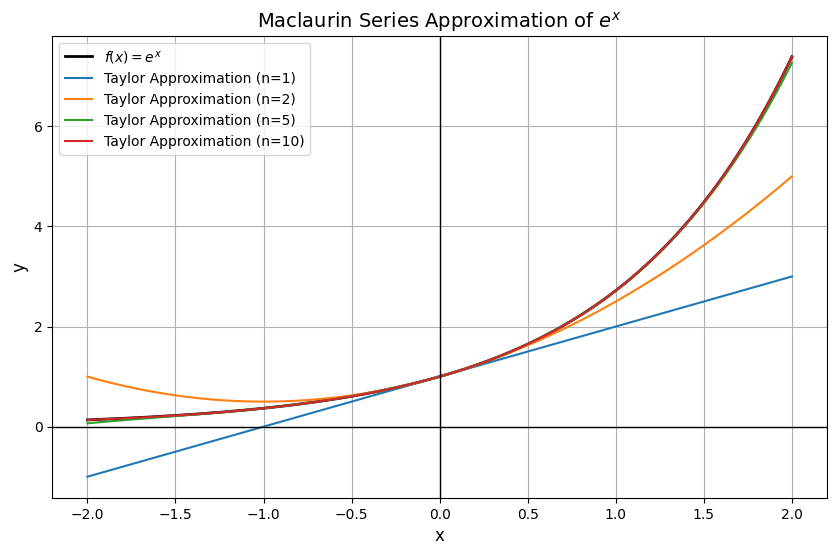

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import math

# define function
def f(x):
    return np.exp(x)

# maclaurin series
def mac_exp(x, n):
    mac_sum = 0
    for i in range(n + 1):
        mac_sum += (x**i) / math.factorial(i)
    return mac_sum


x_values = np.linspace(-2, 2, 400)
f_values = f(x_values)

# plot original function
plt.figure(figsize=(10, 6))
plt.plot(x_values, f_values, label=r'$f(x) = e^x$', color='black', linewidth=2)

for n in [1, 2, 5, 10]:
    mac_values = mac_exp(x_values, n)
    plt.plot(x_values, mac_values, label=f'Taylor Approximation (n={n})')

plt.title('Maclaurin Series Approximation of $e^x$', fontsize=14)
plt.xlabel('x', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.axhline(0, color='black', linewidth=1)
plt.axvline(0, color='black', linewidth=1)
plt.grid(True)
plt.legend()
plt.show()
